In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
plt.style.use('fivethirtyeight')

In [2]:
df= pd.read_csv('ML+02+Time+Series+Dataset+1.csv')

In [3]:
df.head()

,Month-Year,Number of Tractor Sold
0,Jan-03,141
1,Feb-03,157
2,Mar-03,185
3,Apr-03,199
4,May-03,203


In [4]:
# changing the name of columns
df.columns =['Date','Sales']

In [5]:
dates = pd.date_range(start ='2003-01-01',freq='MS',periods=len(df))

In [6]:
dates

DatetimeIndex(['2003-01-01', '2003-02-01', '2003-03-01', '2003-04-01',
               '2003-05-01', '2003-06-01', '2003-07-01', '2003-08-01',
               '2003-09-01', '2003-10-01',
               ...
               '2014-03-01', '2014-04-01', '2014-05-01', '2014-06-01',
               '2014-07-01', '2014-08-01', '2014-09-01', '2014-10-01',
               '2014-11-01', '2014-12-01'],
              dtype='datetime64[ns]', length=144, freq='MS')

In [7]:
df['Date']=dates # date column will be replaced with dates

In [8]:
df = df.set_index('Date')  # date column will be set as index
df.head()

,Sales
Date,
2003-01-01,141
2003-02-01,157
2003-03-01,185
2003-04-01,199
2003-05-01,203


In [9]:
df.head()

,Sales
Date,
2003-01-01,141
2003-02-01,157
2003-03-01,185
2003-04-01,199
2003-05-01,203


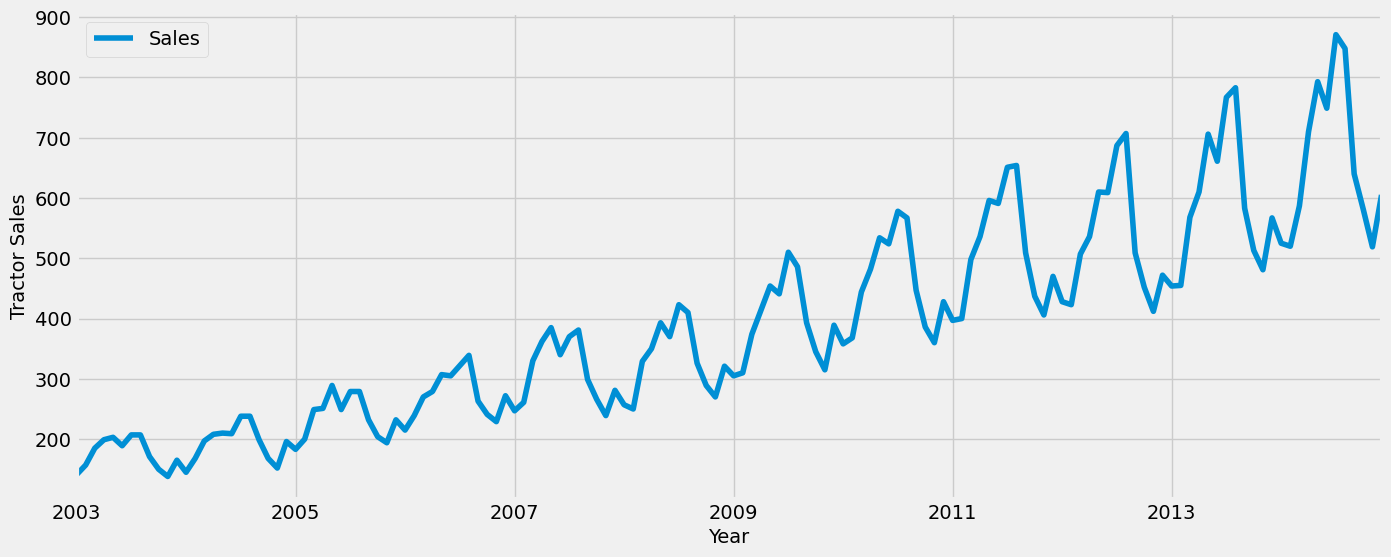

In [10]:
df.plot(figsize=(15,6))
plt.xlabel('Year')
plt.ylabel('Tractor Sales')
plt.show()

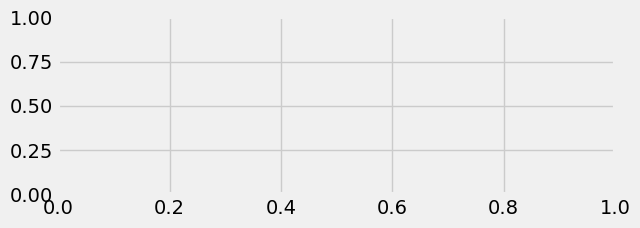

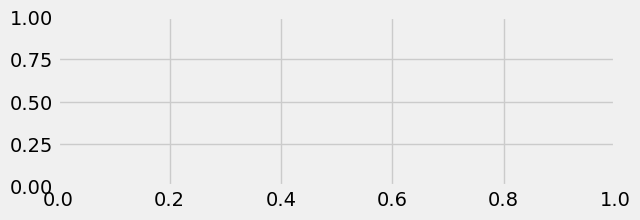

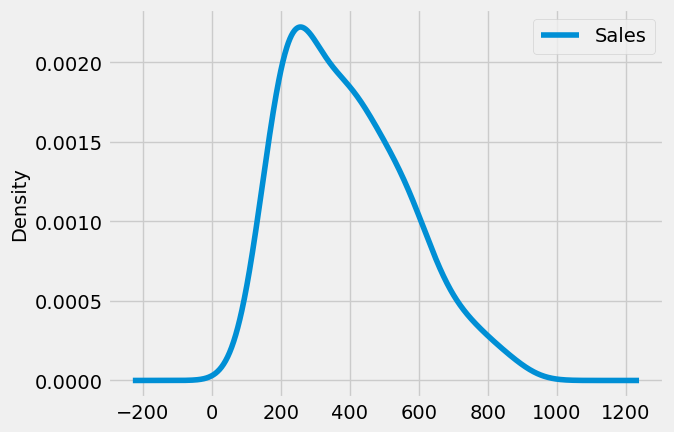

In [11]:
plt.figure(1)
plt.subplot(211)
df.hist()
plt.subplot(212)
df.plot(kind='kde')
plt.show()

<Axes: xlabel='Date', ylabel='Sales'>

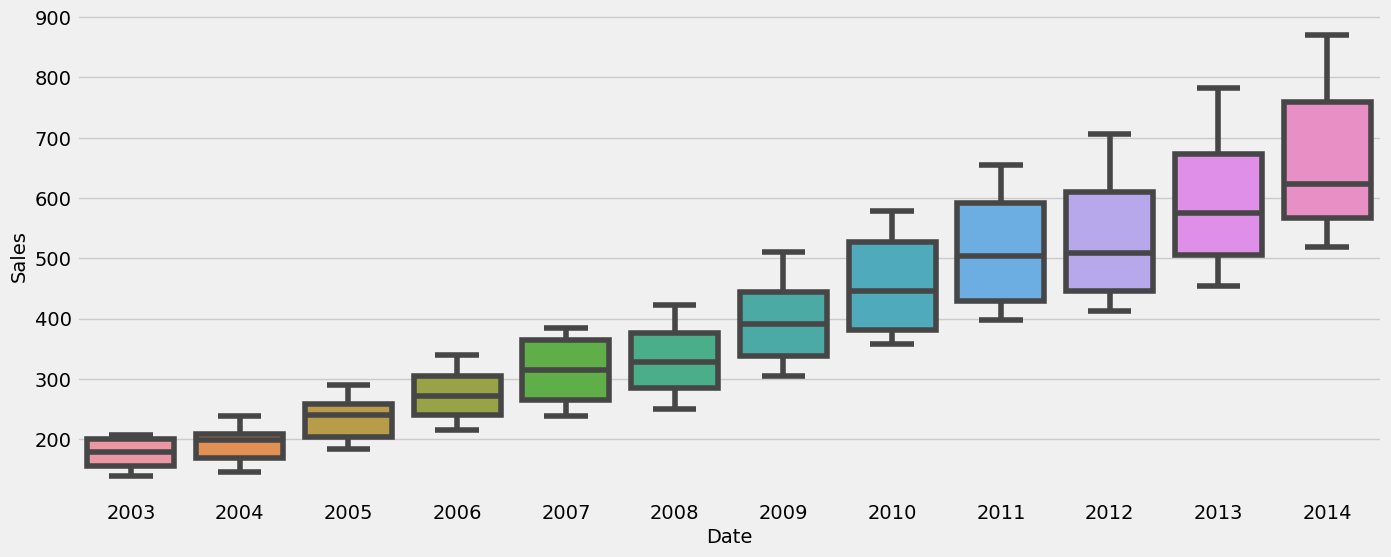

In [12]:
fig, ax= plt.subplots(figsize=(15,6))
sns.boxplot(x=df['Sales'].index.year,y=df['Sales'],ax=ax)

<Axes: xlabel='Date', ylabel='Sales'>

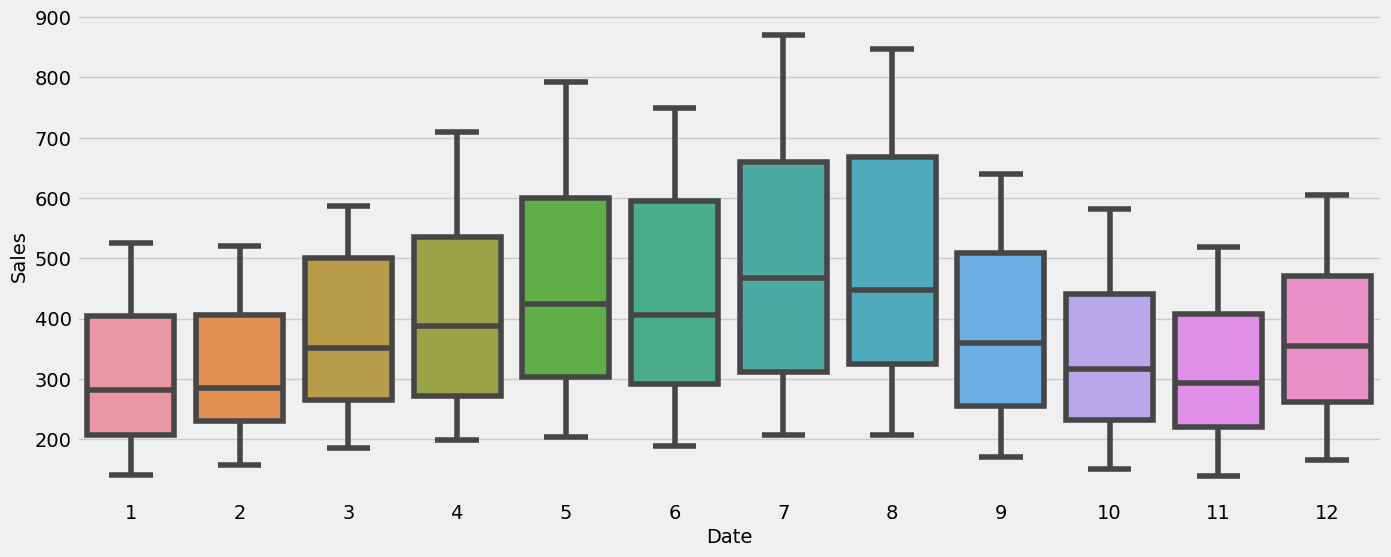

In [13]:
fig,ax=plt.subplots(figsize=(15,6))
sns.boxplot(x=df['Sales'].index.month,y=df['Sales'], ax=ax)

In [14]:
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose

<Figure size 1800x800 with 0 Axes>

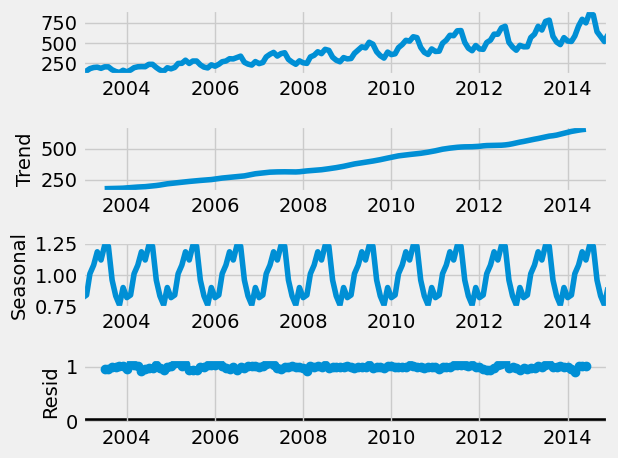

In [15]:
#from pylab import rcParam
#rcParams['figure.figsize']=18,8
plt.figure(figsize=(18,8))
decomposition = sm.tsa.seasonal_decompose(df,model='multiplicative')
fig =decomposition.plot()
plt.show()

<Figure size 1800x1600 with 0 Axes>

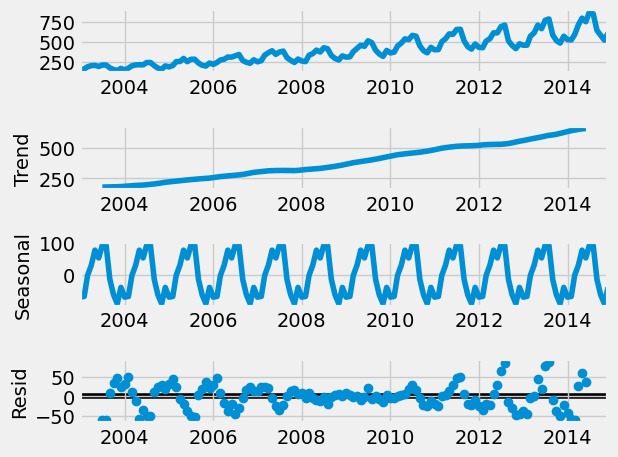

In [16]:
plt.figure(figsize=(18,16))
decomposition1 = sm.tsa.seasonal_decompose(df,model='additive')
fig =decomposition1.plot()
plt.show()

In [17]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
# from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.stattools import adfuller

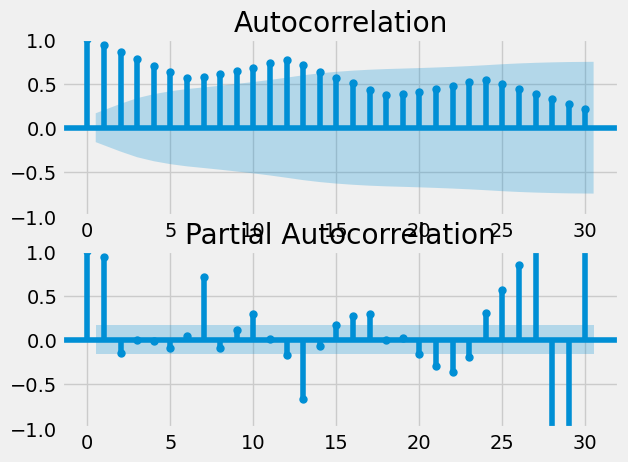

In [18]:
plt.figure(1)
plt.subplot(211)
plot_acf(df.Sales,ax=plt.gca(),lags=30)
plt.subplot(212)
plot_pacf(df.Sales,ax=plt.gca(),lags=30)
plt.show()

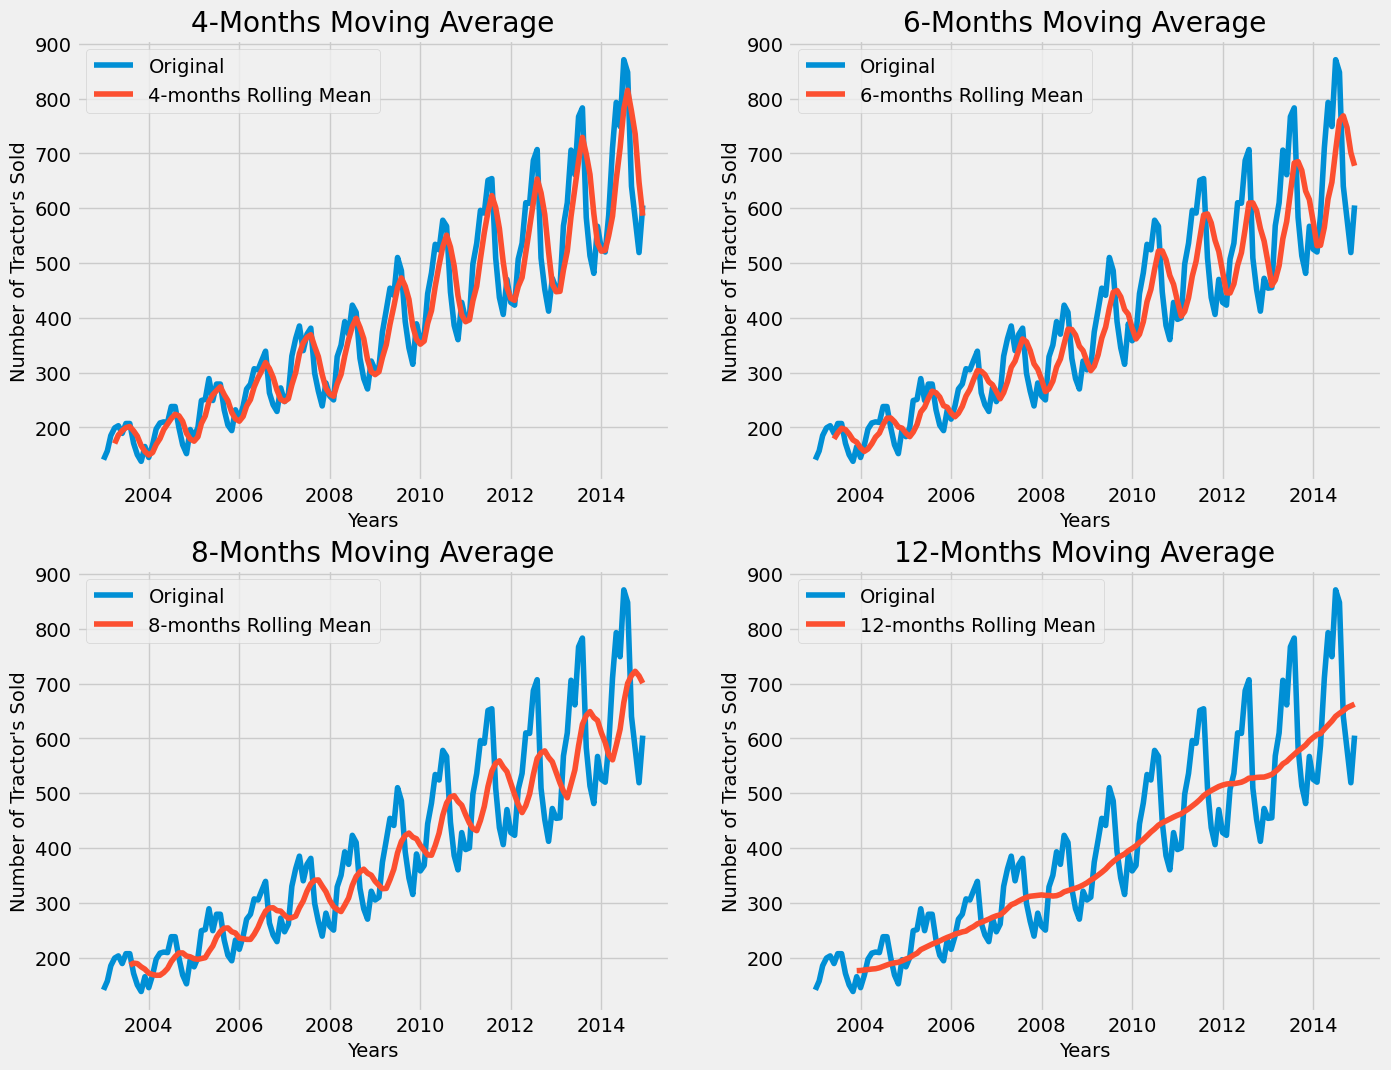

In [19]:
fig , axes =plt.subplots(2,2)
fig.set_figwidth(15)
fig.set_figheight(12)
axes[0][0].plot(df.index,df,label='Original')
axes[0][0].plot(df.index,df.rolling(window=4).mean(),label='4-months Rolling Mean')
axes[0][0].set_xlabel('Years')
axes[0][0].set_ylabel("Number of Tractor's Sold")
axes[0][0].set_title('4-Months Moving Average')
axes[0][0].legend(loc='best')

axes[0][1].plot(df.index,df,label='Original')
axes[0][1].plot(df.index,df.rolling(window=6).mean(),label='6-months Rolling Mean')
axes[0][1].set_xlabel('Years')
axes[0][1].set_ylabel("Number of Tractor's Sold")
axes[0][1].set_title('6-Months Moving Average')
axes[0][1].legend(loc='best')

axes[1][0].plot(df.index,df,label='Original')
axes[1][0].plot(df.index,df.rolling(window=8).mean(),label='8-months Rolling Mean')
axes[1][0].set_xlabel('Years')
axes[1][0].set_ylabel("Number of Tractor's Sold")
axes[1][0].set_title('8-Months Moving Average')
axes[1][0].legend(loc='best')

axes[1][1].plot(df.index,df,label='Original')
axes[1][1].plot(df.index,df.rolling(window=12).mean(),label='12-months Rolling Mean')
axes[1][1].set_xlabel('Years')
axes[1][1].set_ylabel("Number of Tractor's Sold")
axes[1][1].set_title('12-Months Moving Average')
axes[1][1].legend(loc='best')

plt.show()

In [20]:
def test_stationarity(timeseries):
    #Determing rolliing statistics
    rolmean = timeseries.rolling(window=12).mean()
    rolstd = timeseries.rolling(window=12).std()
    
    #plot rolling statistics:
    orig =plt.plot(timeseries, color ='red',label='Original')
    mean =plt.plot(rolmean,color='blue',label='Rolling Mean')
    std =plt.plot(rolstd,color='black',label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()
    
    #perform Dickey-Fuller test:
    print('Results of Dickey-fuller Test:')
    dftest = adfuller(timeseries,autolag='AIC')
    dfoutput = pd.Series(dftest[0:4],index=['Test Statistic','p-value','#Lags used','Number of observations used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value(%s)' %key]=value
        print(dfoutput)

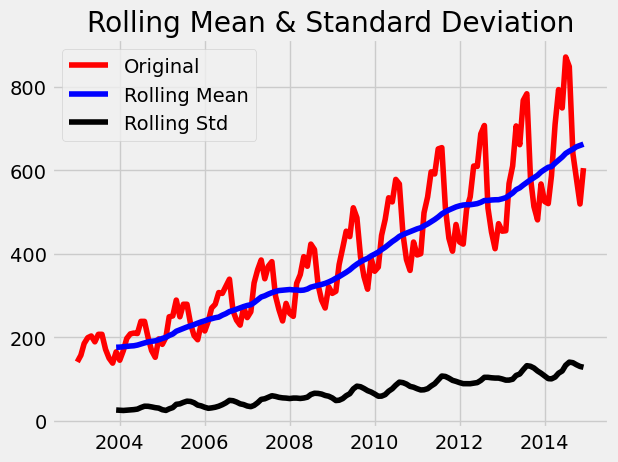

Results of Dickey-fuller Test:
Test Statistic                   1.108825
p-value                          0.995291
#Lags used                      14.000000
Number of observations used    129.000000
Critical Value(1%)              -3.482088
dtype: float64
Test Statistic                   1.108825
p-value                          0.995291
#Lags used                      14.000000
Number of observations used    129.000000
Critical Value(1%)              -3.482088
Critical Value(5%)              -2.884219
dtype: float64
Test Statistic                   1.108825
p-value                          0.995291
#Lags used                      14.000000
Number of observations used    129.000000
Critical Value(1%)              -3.482088
Critical Value(5%)              -2.884219
Critical Value(10%)             -2.578864
dtype: float64


In [21]:
test_stationarity(df['Sales'])

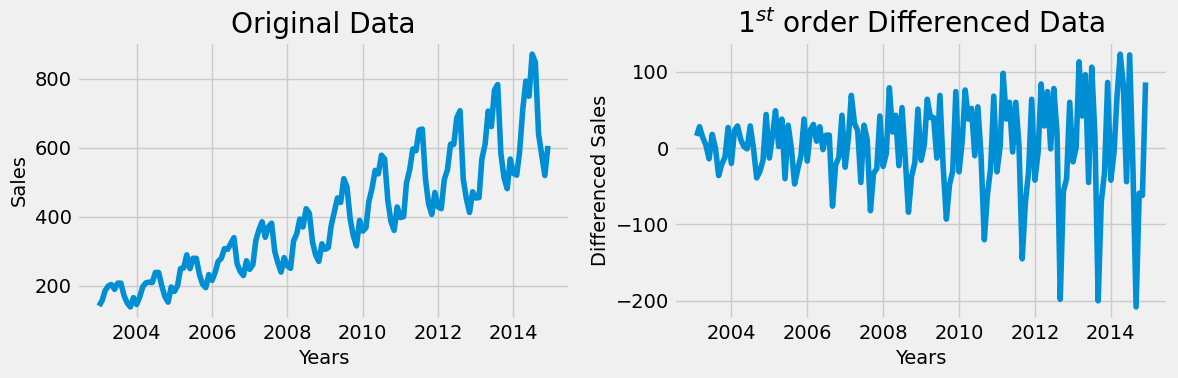

In [22]:
fig, axes=plt.subplots(1,2)
fig.set_figwidth(12)
fig.set_figheight(4)
axes[0].plot(df.index,df['Sales'])
axes[0].set_xlabel('Years')
axes[0].set_ylabel('Sales')
axes[0].set_title('Original Data')

#Differencing
axes[1].plot(df.index,df['Sales'].diff(periods=1))
axes[1].set_xlabel('Years')
axes[1].set_ylabel('Differenced Sales')
axes[1].set_title('1$^{st}$ order Differenced Data')
plt.tight_layout()
plt.show()

# Making Variance Constant through Log transformation

log transform data to make data stationary on variance
The log transformation has made variance stationary but mean is still increasing

Text(0.5, 1.0, 'Constant Variance Time Series')

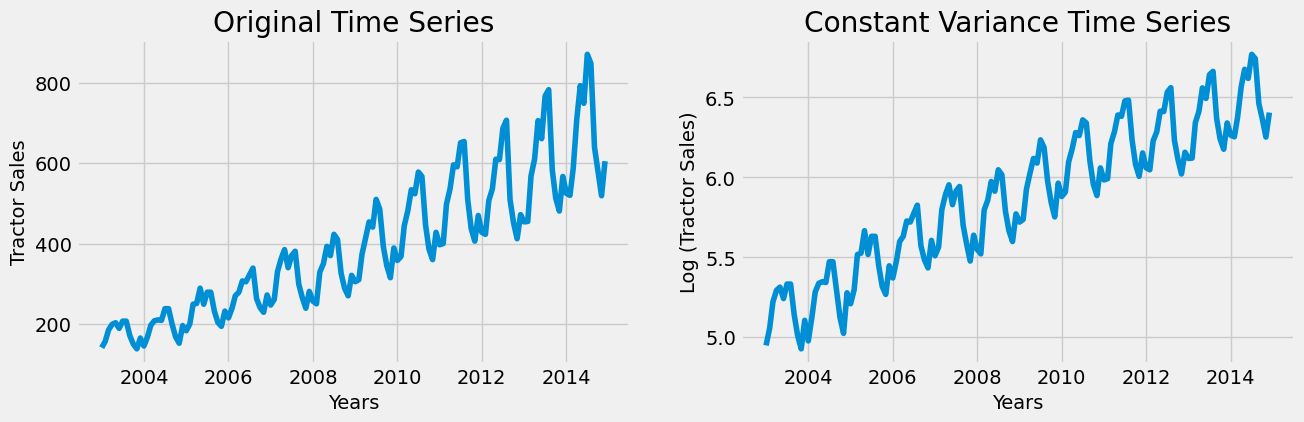

In [23]:
fig,axes=plt.subplots(1,2)
fig.set_figheight(4)
fig.set_figwidth(14)
axes[0].plot(df)
axes[0].set_xlabel('Years')
axes[0].set_ylabel('Tractor Sales')
axes[0].set_title('Original Time Series')
#log transform
df_log = np.log(df)
axes[1].plot(df_log)
axes[1].set_xlabel('Years')
axes[1].set_ylabel('Log (Tractor Sales)')
axes[1].set_title('Constant Variance Time Series')

#  Difference Log transform data to make data stationary on both mean and variance

Text(0, 0.5, 'Differenced Log (Tractor Sales)')

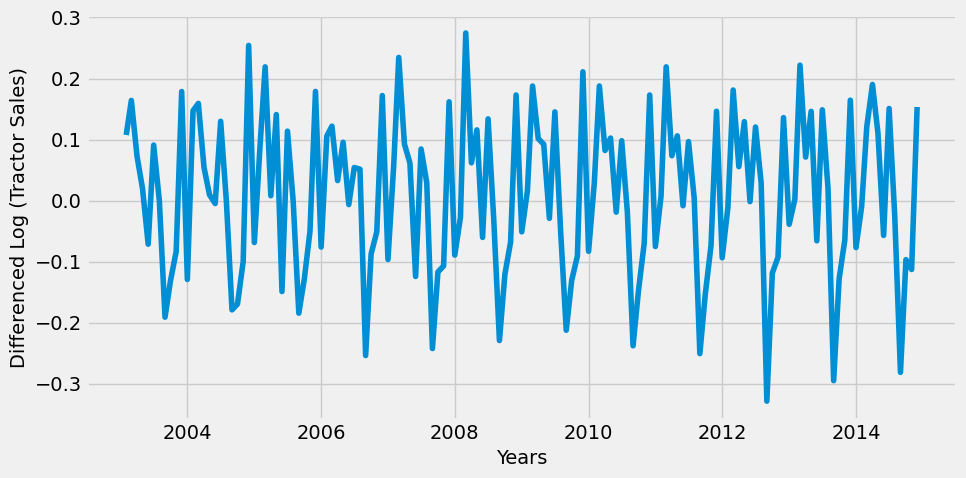

In [24]:
plt.figure(figsize=(10,5))
df_log_diff =np.log(df).diff(periods=1)
plt.plot(df_log_diff)
plt.xlabel('Years')
plt.ylabel('Differenced Log (Tractor Sales)')

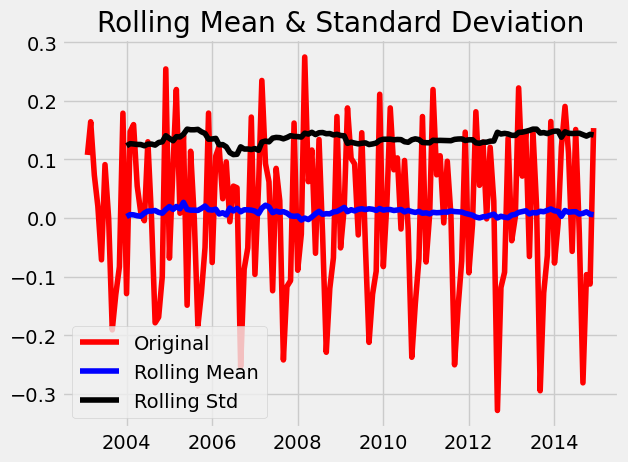

Results of Dickey-fuller Test:
Test Statistic                  -2.680467
p-value                          0.077480
#Lags used                      14.000000
Number of observations used    128.000000
Critical Value(1%)              -3.482501
dtype: float64
Test Statistic                  -2.680467
p-value                          0.077480
#Lags used                      14.000000
Number of observations used    128.000000
Critical Value(1%)              -3.482501
Critical Value(5%)              -2.884398
dtype: float64
Test Statistic                  -2.680467
p-value                          0.077480
#Lags used                      14.000000
Number of observations used    128.000000
Critical Value(1%)              -3.482501
Critical Value(5%)              -2.884398
Critical Value(10%)             -2.578960
dtype: float64


In [25]:
df_log_diff.dropna(inplace=True)
test_stationarity(df_log_diff)

# ACF and PACF to identify potential AR and MA model

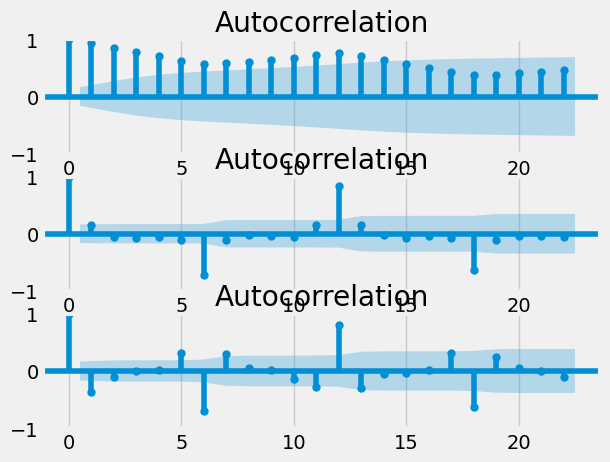

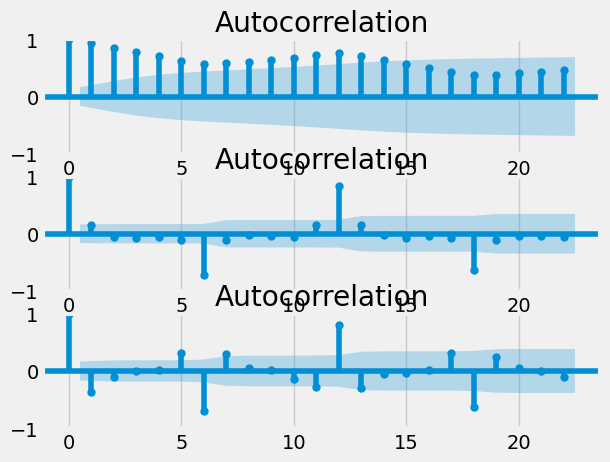

In [26]:
fig, (ax1,ax2,ax3)=plt.subplots(3)
plot_acf(df.Sales,ax=ax1)
plot_acf(df.Sales.diff().dropna(),ax=ax2)
plot_acf(df.Sales.diff().diff().dropna(),ax=ax3)

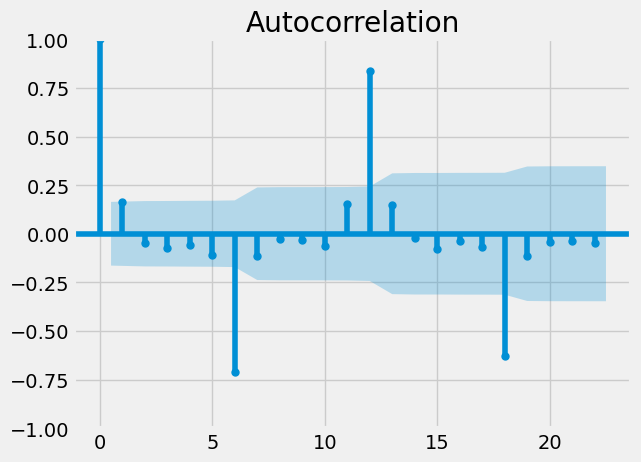

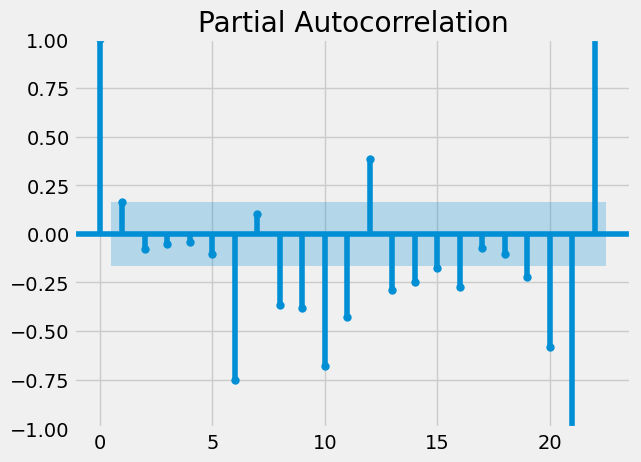

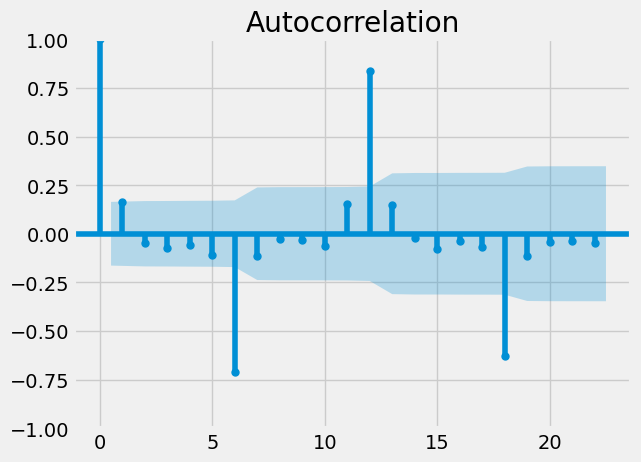

In [27]:
plot_pacf(df.diff().dropna())
plot_acf(df.diff().dropna())
#p=1 or p=2 and q=1or 2

C:\Users\Lenovo\New folder\anaconda2023\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Lenovo\New folder\anaconda2023\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Lenovo\New folder\anaconda2023\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Lenovo\New folder\anaconda2023\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


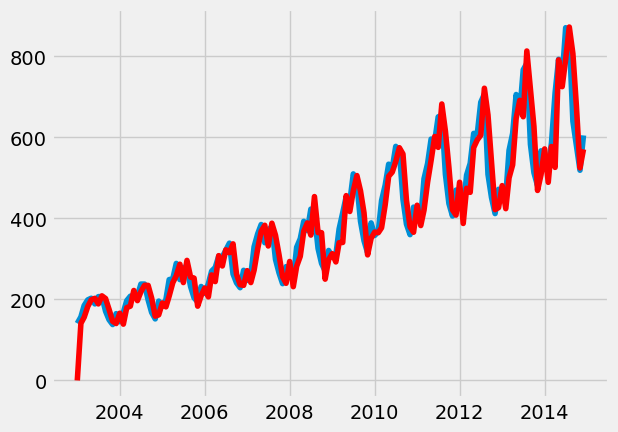

In [28]:
from statsmodels.tsa.arima_model import ARIMA
model =sm.tsa.arima.ARIMA(df, order=(2,1,2))
results_ARIMA =model.fit()
plt.plot(df)
plt.plot(results_ARIMA.fittedvalues,color='red')
plt.show()

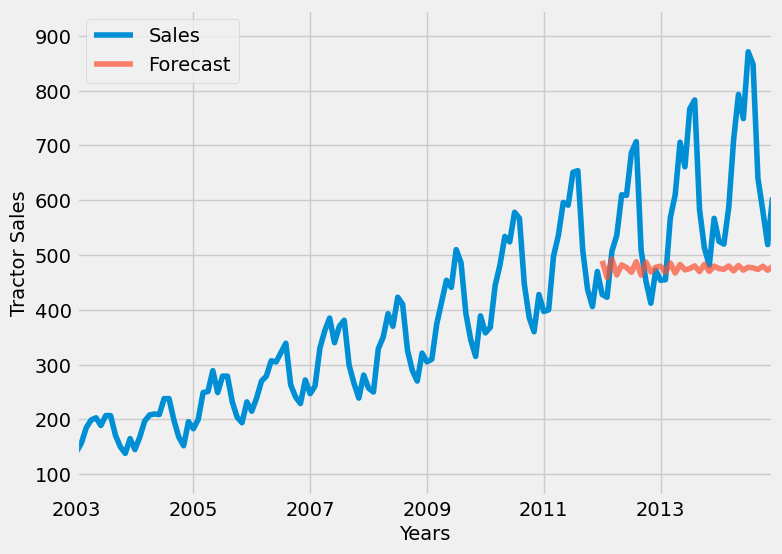

In [38]:
pred_arima =results_ARIMA.predict(start=pd.to_datetime('2012-01-01'),end =pd.to_datetime('2014-12-01'),dynamic=True)
axis = df.plot(label='Orginal',figsize=(8,6))
pred_arima.plot(ax=axis,label='Forecast',alpha=0.7)
axis.fill_betweenx(axis.get_ylim(),pd.to_datetime('2012-01-01'),df.index[-1],alpha=0.1,zorder=-1)
axis.set_xlabel('Years')
axis.set_ylabel('Tractor Sales')
plt.legend(loc='best')
plt.show()
plt.close()

C:\Users\Lenovo\New folder\anaconda2023\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Lenovo\New folder\anaconda2023\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


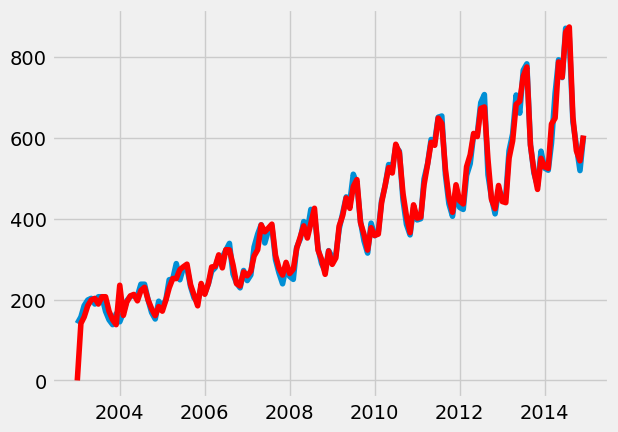

In [29]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
model =sm.tsa.statespace.SARIMAX(df, order=(1,1,2),seasonal_order=(1,1,2,12))
results_SARIMAX =model.fit()
plt.plot(df)
plt.plot(results_SARIMAX.fittedvalues,color='red')
plt.show()

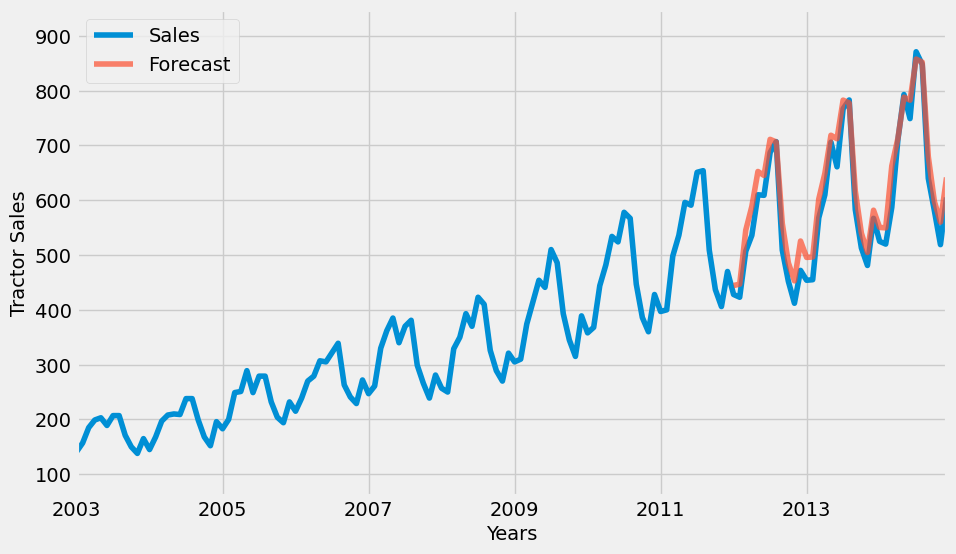

In [39]:
pred_sarima =results_SARIMAX.predict(start=pd.to_datetime('2012-01-01'),end =pd.to_datetime('2014-12-01'),dynamic=True)
axis = df.plot(label='Orginal',figsize=(10,6))
pred_sarima.plot(ax=axis,label='Forecast',alpha=0.7)
axis.fill_betweenx(axis.get_ylim(),pd.to_datetime('2012-01-01'),df.index[-1],alpha=0.1,zorder=-1)
axis.set_xlabel('Years')
axis.set_ylabel('Tractor Sales')
plt.legend(loc='best')
plt.show()
plt.close()

In [40]:
!pip install pmdarima

     -------------------------------------- 613.3/613.3 kB 7.7 MB/s eta 0:00:00
     ---------------------------------------- 2.8/2.8 MB 8.0 MB/s eta 0:00:00


In [42]:
from pmdarima import auto_arima
model = auto_arima(df,start_p=1,start_q=1,
                  max_p=3,max_q=3,m=12,
                  start_P=0,seasonal=True,
                  d=1,D=1,trace=True,
                  error_action='ignore',
                  suppress_warnings=True,information_criterion='aic',
                  stepwise=True)
print('best aic:',model.aic())
print('best order:',model.order)
print('best seasonal order:',model.seasonal_order)
#use adtest to find optimal 'd'
#maximum p and q


Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=1126.461, Time=0.24 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=1133.413, Time=0.03 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=1124.270, Time=0.11 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=1124.489, Time=0.13 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=1123.180, Time=0.05 sec
 ARIMA(1,1,0)(0,1,1)[12]             : AIC=1124.536, Time=0.13 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=1123.631, Time=0.31 sec
 ARIMA(2,1,0)(0,1,0)[12]             : AIC=1125.170, Time=0.07 sec
 ARIMA(1,1,1)(0,1,0)[12]             : AIC=1125.153, Time=0.09 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=1123.225, Time=0.06 sec
 ARIMA(2,1,1)(0,1,0)[12]             : AIC=1119.806, Time=0.22 sec
 ARIMA(2,1,1)(1,1,0)[12]             : AIC=1120.909, Time=0.39 sec
 ARIMA(2,1,1)(0,1,1)[12]             : AIC=1121.150, Time=0.42 sec
 ARIMA(2,1,1)(1,1,1)[12]             : AIC=inf, Time=0.70 sec
 ARIMA(3,1,1)(0,1,0)[12]

C:\Users\Lenovo\New folder\anaconda2023\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Lenovo\New folder\anaconda2023\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


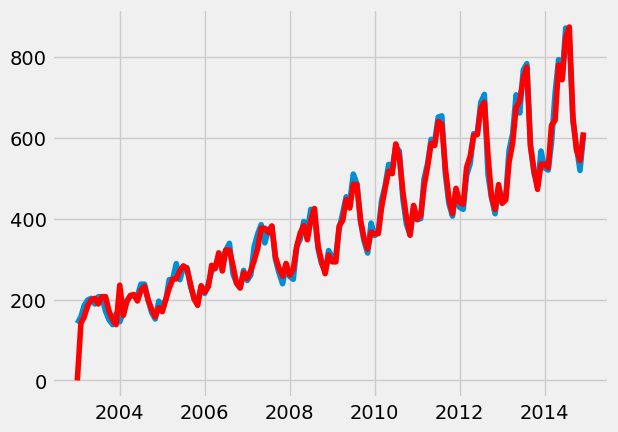

In [49]:
order=model.order
seasonal_order=model.seasonal_order
model =sm.tsa.statespace.SARIMAX(df, order=(2,1,1),seasonal_order=(0,1,0,12),
                                enforce_stationarity=True,
                                enforce_invertibility=True)
results_SARIMAX =model.fit()
plt.plot(df)
plt.plot(results_SARIMAX.fittedvalues,color='red')
plt.show()

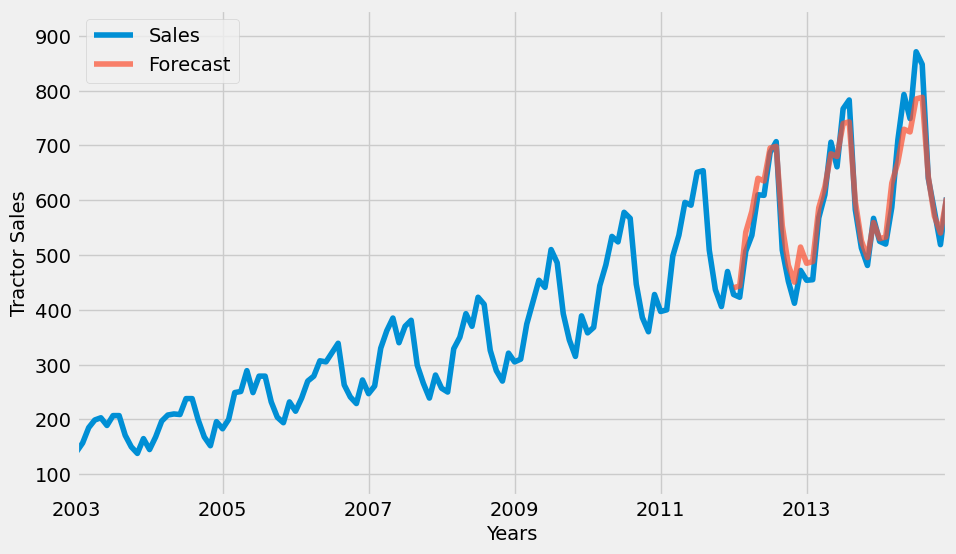

In [50]:
pred_sarima =results_SARIMAX.predict(start=pd.to_datetime('2012-01-01'),end =pd.to_datetime('2014-12-01'),dynamic=True)
axis = df.plot(label='Orginal',figsize=(10,6))
pred_sarima.plot(ax=axis,label='Forecast',alpha=0.7)
axis.fill_betweenx(axis.get_ylim(),pd.to_datetime('2012-01-01'),df.index[-1],alpha=0.1,zorder=-1)
axis.set_xlabel('Years')
axis.set_ylabel('Tractor Sales')
plt.legend(loc='best')
plt.show()
plt.close()

In [52]:
forecast= results_SARIMAX.forecast(step=36)


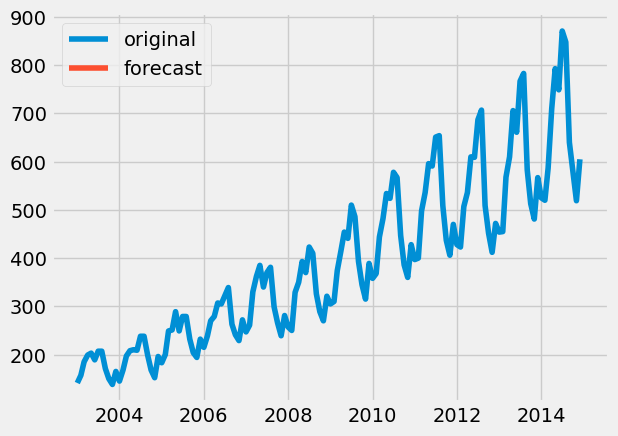

In [53]:
idx= pd.date_range(df.index[-1],periods=36,freq='MS')
plt.plot(df,label='original')
plt.plot(forecast,label='forecast')
plt.legend()

In [54]:
forecast=results_SARIMAX.forecast(steps=36)
forecast

2015-01-01     565.087777
2015-02-01     561.337202
2015-03-01     629.495566
2015-04-01     753.434537
2015-05-01     837.224303
2015-06-01     793.881623
2015-07-01     916.430336
2015-08-01     893.888000
2015-09-01     686.269816
2015-10-01     627.588331
2015-11-01     565.854046
2015-12-01     652.075712
2016-01-01     612.348408
2016-02-01     608.752097
2016-03-01     677.039152
2016-04-01     801.085480
2016-05-01     884.964805
2016-06-01     841.696840
2016-07-01     964.307879
2016-08-01     941.817540
2016-09-01     734.242731
2016-10-01     675.597432
2016-11-01     613.893333
2016-12-01     700.140181
2017-01-01     660.433885
2017-02-01     656.855099
2017-03-01     725.156774
2017-04-01     849.215299
2017-05-01     933.104799
2017-06-01     889.845321
2017-07-01    1012.463441
2017-08-01     989.979008
2017-09-01     782.409127
2017-10-01     723.767939
2017-11-01     662.067269
2017-12-01     748.316978
Freq: MS, Name: predicted_mean, dtype: float64

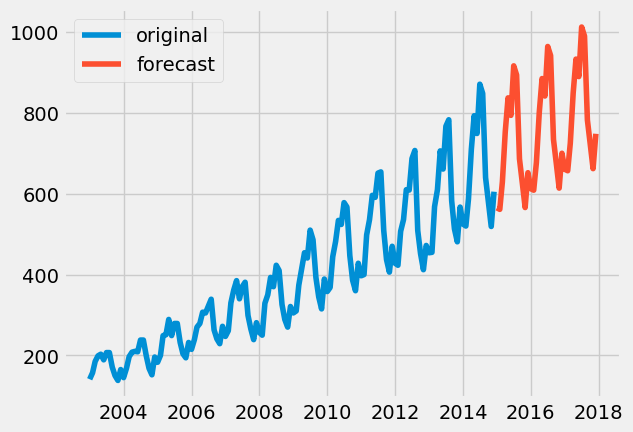

In [55]:
idx= pd.date_range(df.index[-1],periods=36,freq='MS')
plt.plot(df,label='original')
plt.plot(forecast,label='forecast')
plt.legend()

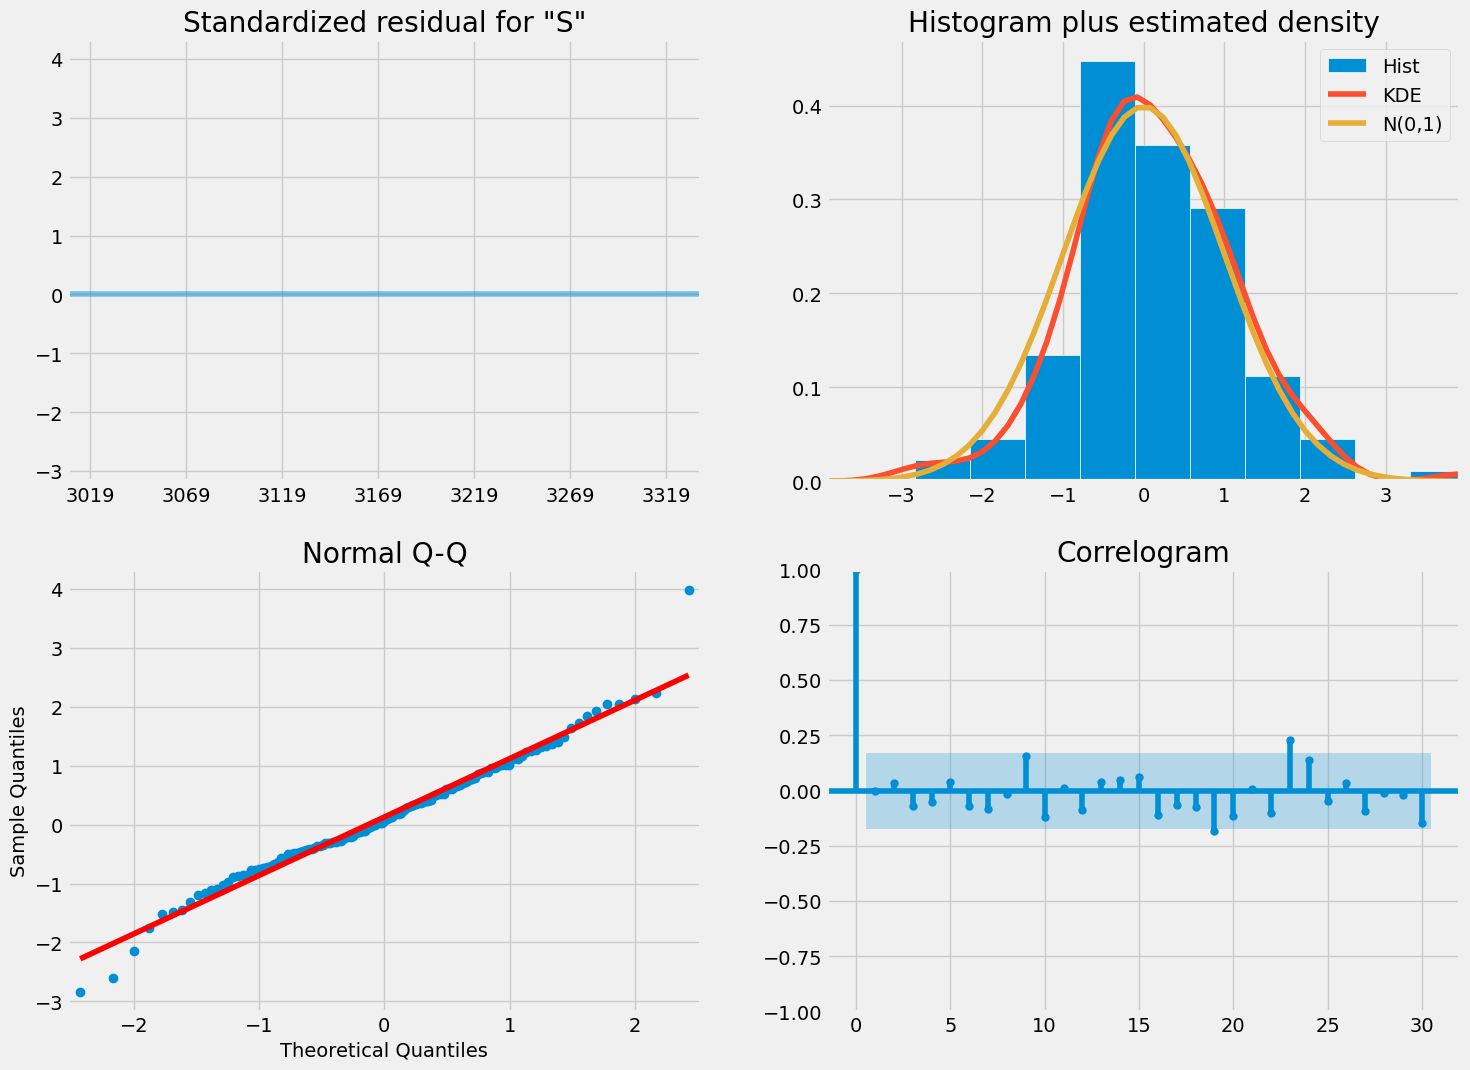

In [57]:
results_SARIMAX.plot_diagnostics(lags=30,figsize=(16,12))
plt.show()

In [58]:
train=df[:'2012']
test=df['2013':]

# Single Exponential Smoothing

In [60]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing, Holt
model = SimpleExpSmoothing(train)
fit1 =model.fit(smoothing_level=0.2)
forecast1=fit1.forecast(steps=24)

C:\Users\Lenovo\New folder\anaconda2023\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [61]:
fit2=model.fit(smoothing_level=0.4)
forecast2=fit1.forecast(steps=24)

In [62]:
fit3=model.fit(smoothing_level=0.8)
forecast3=fit1.forecast(steps=24)

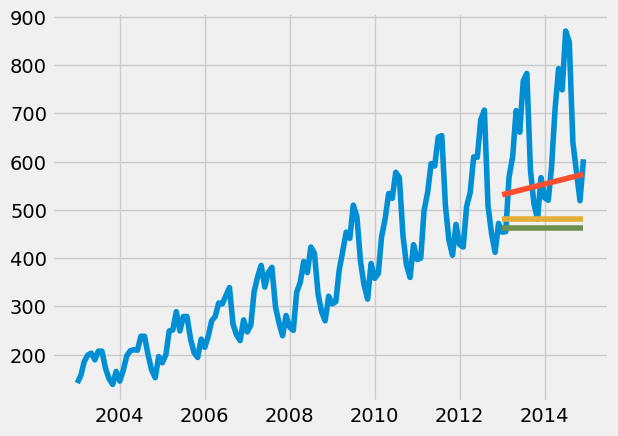

In [72]:
plt.plot(df,label='actual sales')
plt.plot(forecast1,label='alpha=0.2')
plt.plot(forecast2,label='alpha=0.6')
plt.plot(forecast3,label='alpha=0.8')

# Double Exponential Smoothing

C:\Users\Lenovo\New folder\anaconda2023\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


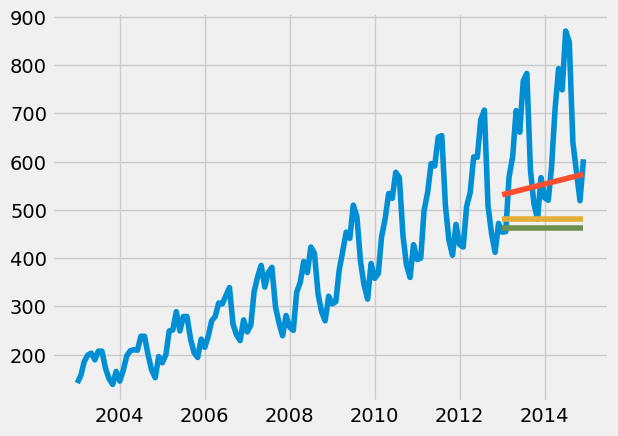

In [67]:
model=Holt(train)
fit1 =model.fit(smoothing_level=0.2,smoothing_slope=0.05)
forecast1=fit1.forecast(steps=24)

fit1 =model.fit(optimized=True)
forecast2=fit2.forecast(steps=24)

fit1 =model.fit(smoothing_level=0.3,smoothing_slope=0.01)
forecast3=fit3.forecast(steps=24)

plt.plot(df,label='actual sales')
plt.plot(forecast1,label='alpha=0.3 beta=0.05')
plt.plot(forecast2,label='optimal alpha & beta')
plt.plot(forecast3,label='alpha=0.3 beta=0.01')


C:\Users\Lenovo\New folder\anaconda2023\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


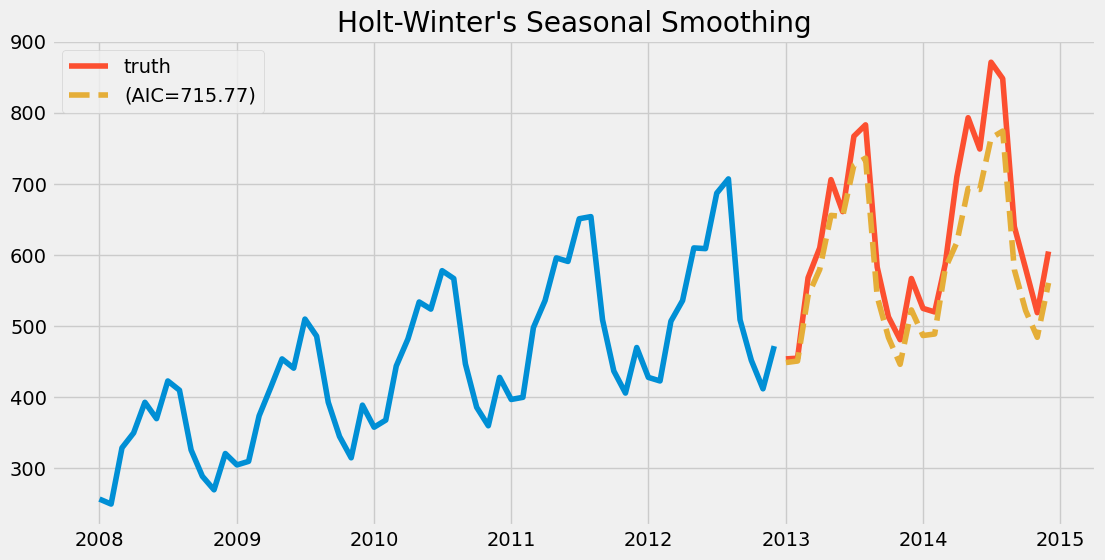

In [71]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

model = ExponentialSmoothing(train,trend='add',seasonal='add',seasonal_periods=12)
fit=model.fit()
pred=fit.forecast(24)

fig,ax=plt.subplots(figsize=(12,6))
ax.plot(train.index[60:],train.values[60:]);
ax.plot(test.index,test.values,label='truth');
ax.plot(test.index,pred,linestyle='--',label='(AIC={:0.2f})'.format(fit.aic));

ax.legend();
ax.set_title("Holt-Winter's Seasonal Smoothing");
